In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

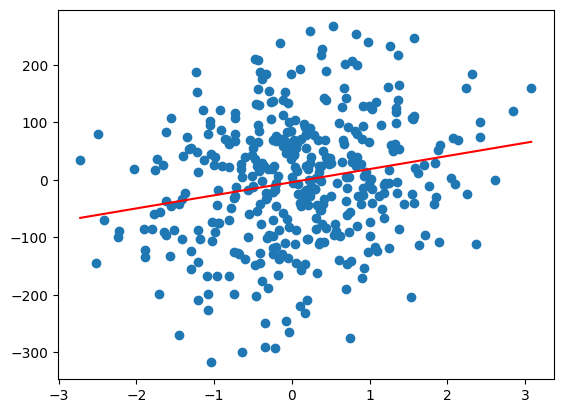

In [28]:
binary = LinearRegression()
binary.fit(x[[0]], y)
binary.predict(x[[0]])
plt.scatter(x[0], y)
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

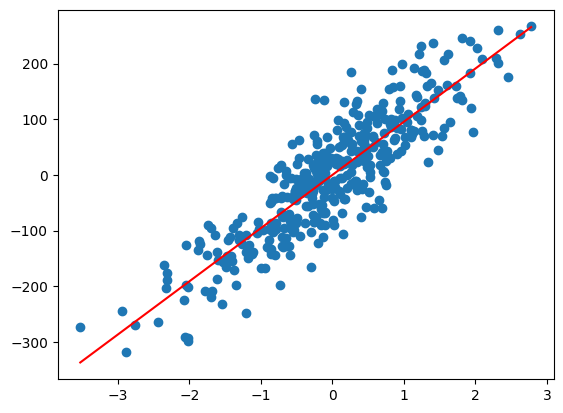

In [29]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

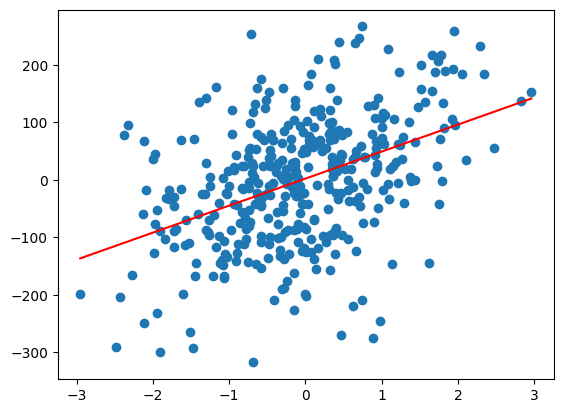

In [30]:
binary = LinearRegression()
binary.fit(x[[2]], y)
binary.predict(x[[2]])
plt.scatter(x[2], y)
xx = np.linspace(x[2].min(), x[2].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

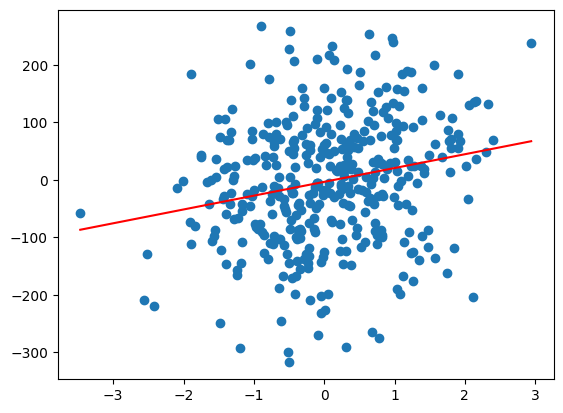

In [31]:
binary = LinearRegression()
binary.fit(x[[3]], y)
binary.predict(x[[3]])
plt.scatter(x[3], y)
xx = np.linspace(x[3].min(), x[3].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

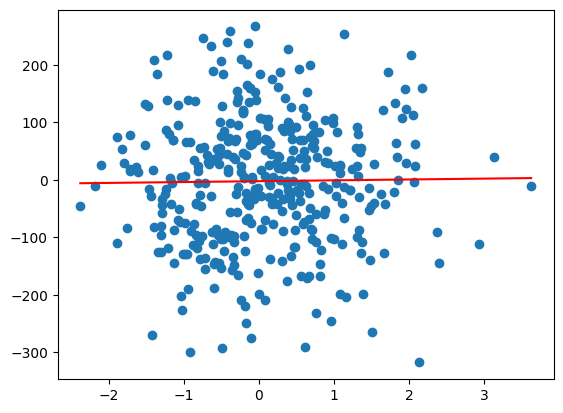

In [32]:
binary = LinearRegression()
binary.fit(x[[4]], y)
binary.predict(x[[4]])
plt.scatter(x[4], y)
xx = np.linspace(x[4].min(), x[4].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [37]:
poly = PolynomialFeatures(degree=2)
poly.fit(x, y)
poly.

PolynomialFeatures()